In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from utils.data import load_tc_data
from utils.plot import make_cmap



In [4]:
models = ['canesm','cnrm6','ecearth6','ipsl6','miroc6','mpi6','mri6','ukmo']
for model in models:
    globals()[f'{model}_nh'] = np.load(f'/user/home/al18709/work/ke_track_rain/hr/{model}_hist_composite_nh_qm.npy')
    globals()[f'{model}_sh'] = np.load(f'/user/home/al18709/work/ke_track_rain/hr/{model}_hist_composite_sh_qm.npy')
    meta = pd.read_csv(f'/user/home/al18709/work/ke_track_inputs/{model}_hist_tracks.csv')
    meta_filtered = meta[meta.year >= 2000].reset_index()
    globals()[f'{model}_nstorms_sh'] = len(meta_filtered[meta_filtered.lat < 0].sid.drop_duplicates())
    globals()[f'{model}_nstorms_nh'] = len(meta_filtered[meta_filtered.lat > 0].sid.drop_duplicates())


In [5]:
nh = np.concatenate([np.expand_dims(globals()[f'{model}_nh'],axis=0) for model in models])
sh = np.concatenate([np.expand_dims(globals()[f'{model}_sh'],axis=0) for model in models])
nstorms_nh = np.sum([globals()[f'{model}_nstorms_nh'] for model in models])
nstorms_sh = np.sum([globals()[f'{model}_nstorms_sh'] for model in models])
nstorms = nstorms_nh + nstorms_sh

In [6]:
print(nstorms_nh)
print(nstorms_sh)

4584
3711


In [7]:
mean_nh = np.mean(nh,axis=0)
mean_sh = np.mean(sh,axis=0)

mean = (nstorms_nh/nstorms)*mean_nh + (nstorms_sh/nstorms)*mean_sh

In [8]:
# define cmap
precip_cmap,precip_norm = make_cmap()

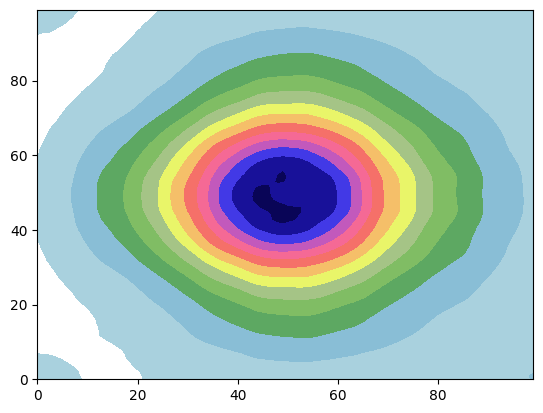

In [9]:
levels = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140]
plt.contourf(mean,cmap=precip_cmap,levels=levels)

In [10]:
reshaped_list = np.array(models).repeat(2).reshape(4, 4)
print(reshaped_list.shape)

(4, 4)


canesm
CANESM (NH)
canesm
CANESM (SH)
cnrm6
CNRM6 (NH)
cnrm6
CNRM6 (SH)
ecearth6
ECEARTH6 (NH)
ecearth6
ECEARTH6 (SH)
ipsl6
IPSL6 (NH)
ipsl6
IPSL6 (SH)
miroc6
MIROC6 (NH)
miroc6
MIROC6 (SH)
mpi6
MPI6 (NH)
mpi6
MPI6 (SH)
mri6
MRI6 (NH)
mri6
MRI6 (SH)
ukmo
UKMO (NH)
ukmo
UKMO (SH)


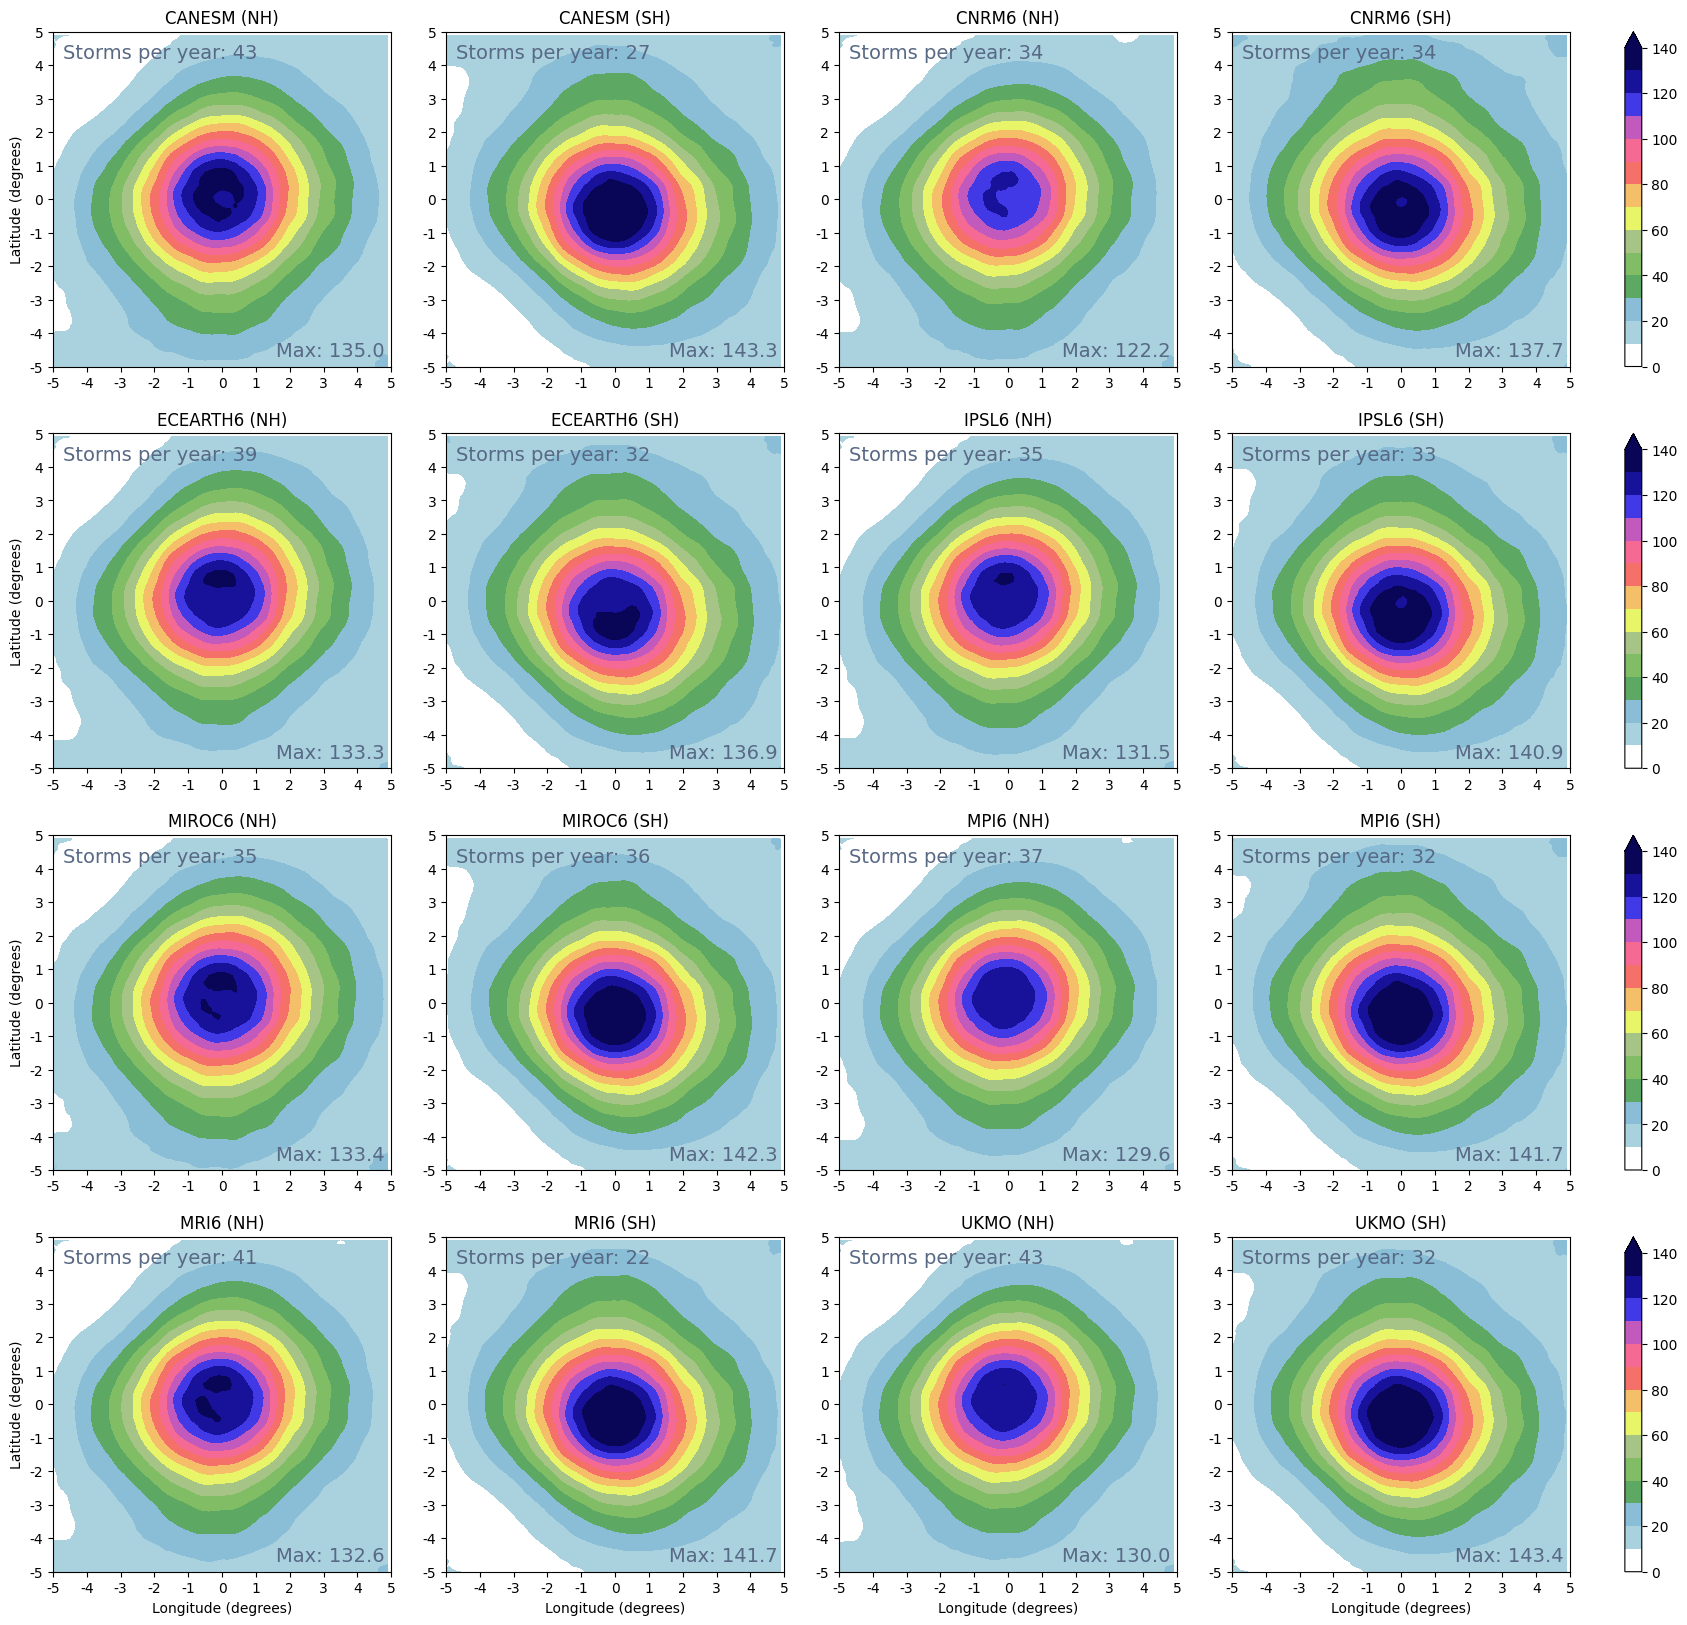

In [11]:

fig,axes = plt.subplots(4,5,figsize=(20.5, 20),gridspec_kw={'width_ratios': [1, 1, 1, 1, 0.05]})

levels = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140]
# levels = [0,10,20,30,40,50,60,top_x,80,90,100,110,120,130,140,160,180,200,220,240]

top_x = 66
nyears = 15
# models = models
titles = ['CANESM (NH)', 'CANESM (SH)', 'CNRM6 (NH)', 'CNRM6 (SH)', 'ECEARTH6 (NH)', 'ECEARTH6 (SH)', 'IPSL6 (NH)', 'IPSL6 (SH)', 'MIROC6 (NH)', 'MIROC6 (SH)', 'MPI6 (NH)', 'MPI6 (SH)', 'MRI6 (NH)', 'MRI6 (SH)', 'UKMO (NH)', 'UKMO (SH)']
reshaped_titles = np.array(titles).reshape(4, 4)

for row in range(4):
	for col in range(5):
		if col == 4:
			continue
		if col in [1,3]:
			h = 'sh'
		else:
			h = 'nh'
		model = reshaped_list[row,col]
		print(model)
		title = reshaped_titles[row,col]
		print(title)
		ax = axes[row,col]
		im = ax.contourf(globals()[f'{model}_{h}'],cmap=precip_cmap,levels=levels,extend='max')
		ax.annotate('Max: %.1f' % np.max(globals()[f'{model}_{h}']), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
		ax.annotate('Storms per year: %.0f' % (globals()[f'{model}_nstorms_{h}'] / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
		ax.set_title(title)


# Set the tick positions
t_p = [0,10,20,30,40,50,60,70,80,90,100]
t_l = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
for i in range(4):
	for j in range(4):
		axes[i,j].set_xticks(t_p)
		axes[i,j].set_yticks(t_p)
		# Set the tick labels
		axes[i,j].set_xticklabels(t_l)
		axes[i,j].set_yticklabels(t_l)

for ax in [axes[0,0],axes[1,0],axes[2,0],axes[3,0]]:
	ax.set_ylabel('Latitude (degrees)')
for ax in [axes[3,0],axes[3,1],axes[3,2],axes[3,3]]:
	ax.set_xlabel('Longitude (degrees)')

plt.colorbar(im,ticks=[0,20,40,60,80,100,120,140],cax=axes[0,4])
plt.colorbar(im,ticks=[0,20,40,60,80,100,120,140],cax=axes[1,4])
plt.colorbar(im,ticks=[0,20,40,60,80,100,120,140],cax=axes[2,4])
plt.colorbar(im,ticks=[0,20,40,60,80,100,120,140],cax=axes[3,4])
# plt.colorbar(im,ticks=[0,20,40,60,80,100,120,140],cax=axes[4,4])


plt.savefig('composite_rain_chips_hist_qm.png',bbox_inches='tight')

In [12]:
models = ['canesm','cnrm6','ecearth6','ipsl6','miroc6','mpi6','mri6','ukmo']
for model in models:
    globals()[f'{model}_nh'] = np.load(f'/user/home/al18709/work/ke_track_rain/hr/{model}_ssp585_composite_nh_qm.npy')
    globals()[f'{model}_sh'] = np.load(f'/user/home/al18709/work/ke_track_rain/hr/{model}_ssp585_composite_sh_qm.npy')
    meta = pd.read_csv(f'/user/home/al18709/work/ke_track_inputs/{model}_ssp585_tracks.csv')
    meta_filtered = meta[meta.year >= 2000].reset_index()
    globals()[f'{model}_nstorms_sh'] = len(meta_filtered[meta_filtered.lat < 0].sid.drop_duplicates())
    globals()[f'{model}_nstorms_nh'] = len(meta_filtered[meta_filtered.lat > 0].sid.drop_duplicates())

In [13]:
nh = np.concatenate([np.expand_dims(globals()[f'{model}_nh'],axis=0) for model in models])
sh = np.concatenate([np.expand_dims(globals()[f'{model}_sh'],axis=0) for model in models])
nstorms_nh = np.sum([globals()[f'{model}_nstorms_nh'] for model in models])
nstorms_sh = np.sum([globals()[f'{model}_nstorms_sh'] for model in models])
nstorms = nstorms_nh + nstorms_sh

canesm
CANESM (NH)
canesm
CANESM (SH)
cnrm6
CNRM6 (NH)
cnrm6
CNRM6 (SH)
ecearth6
ECEARTH6 (NH)
ecearth6
ECEARTH6 (SH)
ipsl6
IPSL6 (NH)
ipsl6
IPSL6 (SH)
miroc6
MIROC6 (NH)
miroc6
MIROC6 (SH)
mpi6
MPI6 (NH)
mpi6
MPI6 (SH)
mri6
MRI6 (NH)
mri6
MRI6 (SH)
ukmo
UKMO (NH)
ukmo
UKMO (SH)


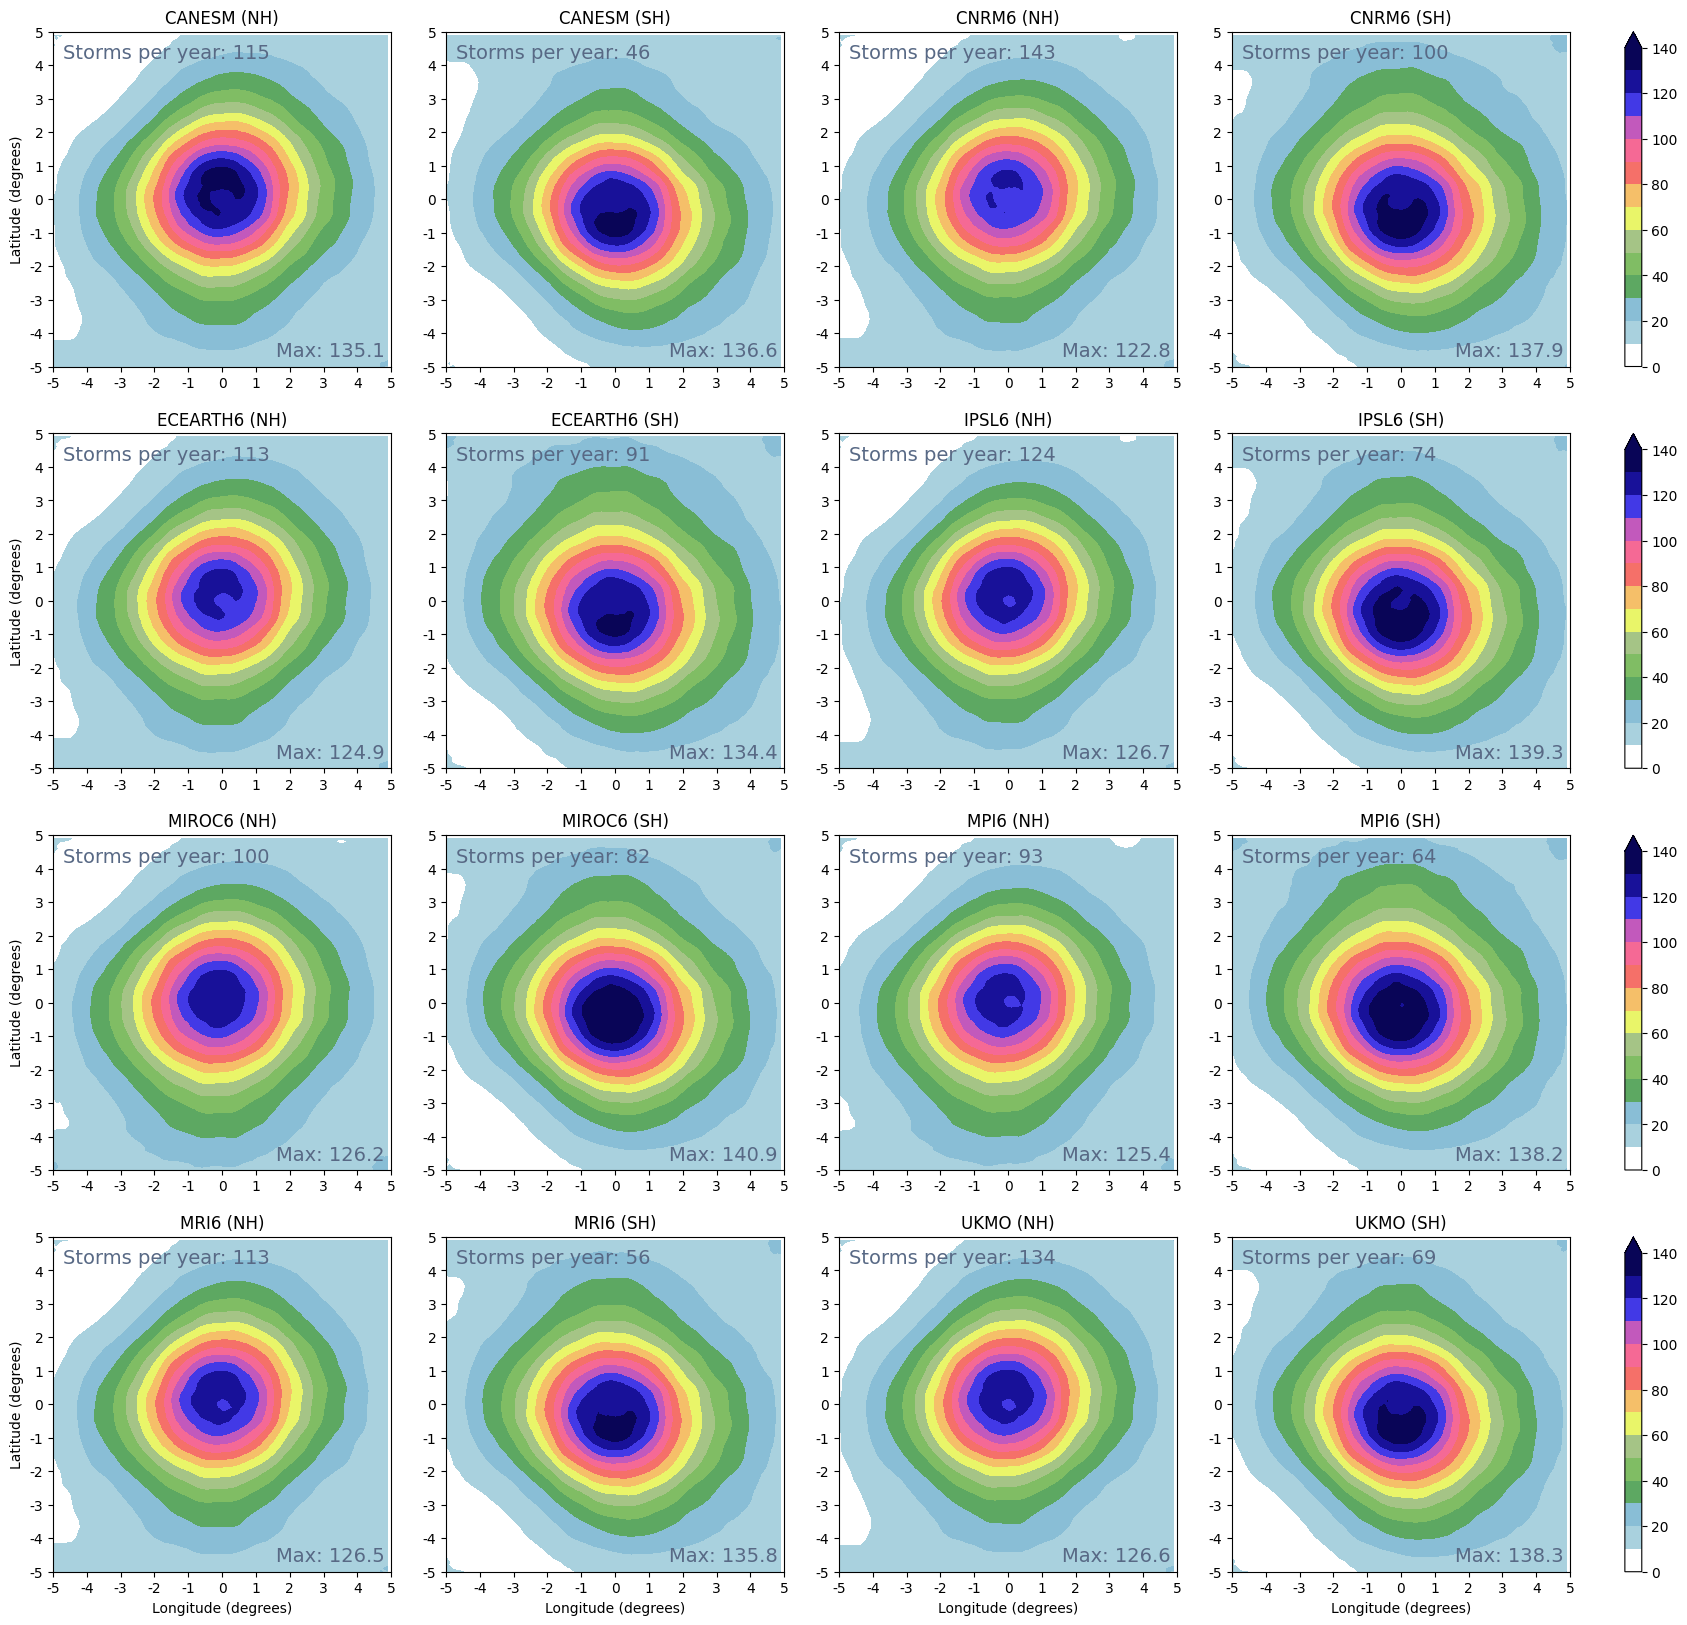

In [14]:

fig,axes = plt.subplots(4,5,figsize=(20.5, 20),gridspec_kw={'width_ratios': [1, 1, 1, 1, 0.05]})

levels = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140]
# levels = [0,10,20,30,40,50,60,top_x,80,90,100,110,120,130,140,160,180,200,220,240]

top_x = 66
nyears = 15
# models = models
titles = ['CANESM (NH)', 'CANESM (SH)', 'CNRM6 (NH)', 'CNRM6 (SH)', 'ECEARTH6 (NH)', 'ECEARTH6 (SH)', 'IPSL6 (NH)', 'IPSL6 (SH)', 'MIROC6 (NH)', 'MIROC6 (SH)', 'MPI6 (NH)', 'MPI6 (SH)', 'MRI6 (NH)', 'MRI6 (SH)', 'UKMO (NH)', 'UKMO (SH)']
reshaped_titles = np.array(titles).reshape(4, 4)

for row in range(4):
	for col in range(5):
		if col == 4:
			continue
		if col in [1,3]:
			h = 'sh'
		else:
			h = 'nh'
		model = reshaped_list[row,col]
		print(model)
		title = reshaped_titles[row,col]
		print(title)
		ax = axes[row,col]
		im = ax.contourf(globals()[f'{model}_{h}'],cmap=precip_cmap,levels=levels,extend='max')
		ax.annotate('Max: %.1f' % np.max(globals()[f'{model}_{h}']), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
		ax.annotate('Storms per year: %.0f' % (globals()[f'{model}_nstorms_{h}'] / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
		ax.set_title(title)


# Set the tick positions
t_p = [0,10,20,30,40,50,60,70,80,90,100]
t_l = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
for i in range(4):
	for j in range(4):
		axes[i,j].set_xticks(t_p)
		axes[i,j].set_yticks(t_p)
		# Set the tick labels
		axes[i,j].set_xticklabels(t_l)
		axes[i,j].set_yticklabels(t_l)

for ax in [axes[0,0],axes[1,0],axes[2,0],axes[3,0]]:
	ax.set_ylabel('Latitude (degrees)')
for ax in [axes[3,0],axes[3,1],axes[3,2],axes[3,3]]:
	ax.set_xlabel('Longitude (degrees)')

plt.colorbar(im,ticks=[0,20,40,60,80,100,120,140],cax=axes[0,4])
plt.colorbar(im,ticks=[0,20,40,60,80,100,120,140],cax=axes[1,4])
plt.colorbar(im,ticks=[0,20,40,60,80,100,120,140],cax=axes[2,4])
plt.colorbar(im,ticks=[0,20,40,60,80,100,120,140],cax=axes[3,4])
# plt.colorbar(im,ticks=[0,20,40,60,80,100,120,140],cax=axes[4,4])


plt.savefig('composite_rain_chips_ssp585_qm.png',bbox_inches='tight')